In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

In [2]:
featureNames = ["seq", "mcg", "gvh", "alm", "mit", "erl", "pox", "vac", "nuc", "loc"]
yeastData = pd.read_csv("yeast.data", sep=" ", names=featureNames)
kFold = KFold(n_splits=2, shuffle=False, random_state=39)
yeastAttrib = yeastData.iloc[:,1:9].values  # fix column indexes
yeastTarget = yeastData["loc"].values

titles = ("GradientBoost",
            "KNN") # add more
models = (GradientBoostingClassifier(n_estimators=100, max_features=None, max_depth=2, random_state=5),
            KNeighborsClassifier())

------------Fold 1
             precision    recall  f1-score   support

        CYT       0.45      0.61      0.52       198
        ERL       0.00      0.00      0.00         5
        EXC       0.43      0.32      0.36        19
        ME1       0.52      0.65      0.58        17
        ME2       0.48      0.39      0.43        33
        ME3       0.72      0.89      0.80        74
        MIT       0.82      0.42      0.55       180
        NUC       0.50      0.53      0.52       197
        POX       0.55      0.43      0.48        14
        VAC       0.00      0.00      0.00         5

avg / total       0.58      0.54      0.54       742

Confusion Matrix: 
 [[121   0   0   0   1   6   7  62   0   1]
 [  0   0   2   0   2   0   0   0   0   1]
 [  5   0   6   3   3   0   0   1   0   1]
 [  0   0   2  11   2   1   0   0   1   0]
 [  2   0   2   5  13   3   1   3   2   2]
 [  0   0   0   0   0  66   0   8   0   0]
 [ 61   0   2   2   2   8  75  27   2   1]
 [ 74   0   0   0   4

/home/diego/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

        CYT       0.42      0.69      0.52       198
        ERL       0.00      0.00      0.00         5
        EXC       0.40      0.42      0.41        19
        ME1       0.42      0.76      0.54        17
        ME2       0.56      0.27      0.37        33
        ME3       0.70      0.77      0.73        74
        MIT       0.76      0.39      0.51       180
        NUC       0.53      0.45      0.49       197
        POX       0.70      0.50      0.58        14
        VAC       0.00      0.00      0.00         5

avg / total       0.57      0.52      0.52       742

Confusion Matrix: 
 [[136   0   0   1   0   5   8  47   1   0]
 [  0   0   2   1   2   0   0   0   0   0]
 [  5   0   8   6   0   0   0   0   0   0]
 [  0   0   2  13   0   1   1   0   0   0]
 [  6   0   3   8   9   3   2   2   0   0]
 [  8   0   0   0   1  57   2   6   0   0]
 [ 74   0   5   1   2   8  70  18   2   0]
 [ 91   0   0   1   2   7   8  88   0   

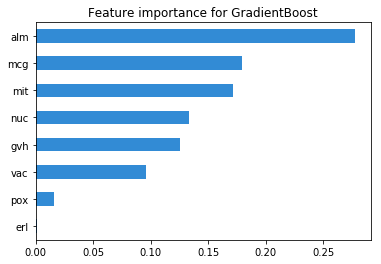

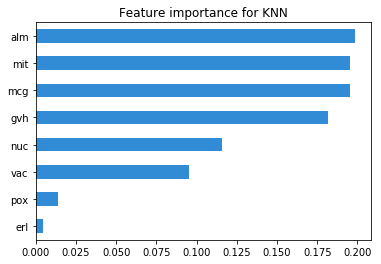

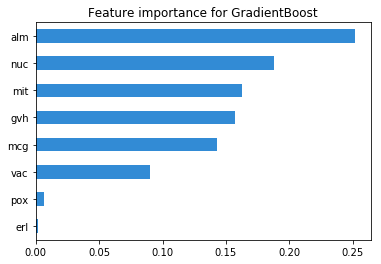

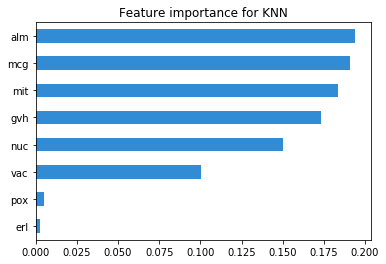

In [10]:
fold = 1
for train_index, test_index in kFold.split(yeastAttrib):
    print(f"------------"
          f"Fold {fold}")
    fold += 1
    for model, title in zip(models, titles):
        train_data, train_target = yeastAttrib[train_index], yeastTarget[train_index]
        test_data, test_target = yeastAttrib[test_index], yeastTarget[test_index]
        clf = model.fit(train_data, train_target)
        
        prediction = clf.predict(test_data)
        print(classification_report(test_target, prediction))
        print(f"Confusion Matrix: \n {confusion_matrix(test_target, prediction)}")
        
        interpreter = Interpretation(test_data, feature_names=featureNames[1:9])
        model_no_proba = InMemoryModel(model.predict, examples=test_data, unique_values=model.classes_)
        ax = interpreter.feature_importance.plot_feature_importance(model_no_proba, ascending=False)
        plt.title(f"Feature importance for {title}")

In [ ]:
# Add PDPs
# Add ICE

In [ ]:
# Add surrogate (¿our own or Skater's?)